In [1]:
from sklearn.neighbors import kneighbors_graph
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from util import * 

In [2]:
iris = load_iris() # load iris dataset

In [3]:
#train classifier
import sklearn
import sklearn.ensemble
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(iris.data, iris.target, train_size=0.80)
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500,random_state=42)
rf.fit(train, labels_train)
sklearn.metrics.accuracy_score(labels_test, rf.predict(test))

0.9333333333333333

In [4]:
#train explanation
# import shap
# explainer = shap.TreeExplainer(rf)
# exp = explainer.shap_values(iris.data,check_additivity=False)[1]
# exp.shape
# import lime.lime_tabular
# import numpy as np
# explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=iris.feature_names, class_names=iris.target_names, discretize_continuous=True,discretizer='quartile')
# from tqdm import tqdm
# exp_data = []
# for d in tqdm(iris.data):
#     exp = explainer.explain_instance(d, rf.predict_proba)
#     exp_data.append(exp.as_list())
# exp = pd.DataFrame([{k:v for k,v in a} for a in exp_data]).fillna(0).to_numpy()
exp = np.genfromtxt('lime_iris',delimiter=',')

In [5]:
import kmapper as km
import networkx as nx

def getGraph(data,exp,clusterer_param,clusterer='knn',projection=True,cover=km.Cover(10, 0.5)):
    
    mapper = km.KeplerMapper(verbose=0)

    if clusterer == 'knn':
        A = kneighbors_graph(data, clusterer_param, mode='connectivity', include_self=True)
        clusterer = knnGraph(A)
        data = np.arange(data.shape[0]).reshape(-1,1)
    else:
        clusterer = sklearn.cluster.DBSCAN(eps=clusterer_param, min_samples=1) 

    if isinstance(projection, int):
        level_set = mapper.fit_transform(exp, projection=np.arange(projection).tolist())
    else:
        level_set = exp
    graph = mapper.map(level_set,
                       data,
                       clusterer=clusterer,
                       cover=cover)
    return graph

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(iris.data)


/Users/gromit/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/gromit/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/gromit/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/gromit/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instea

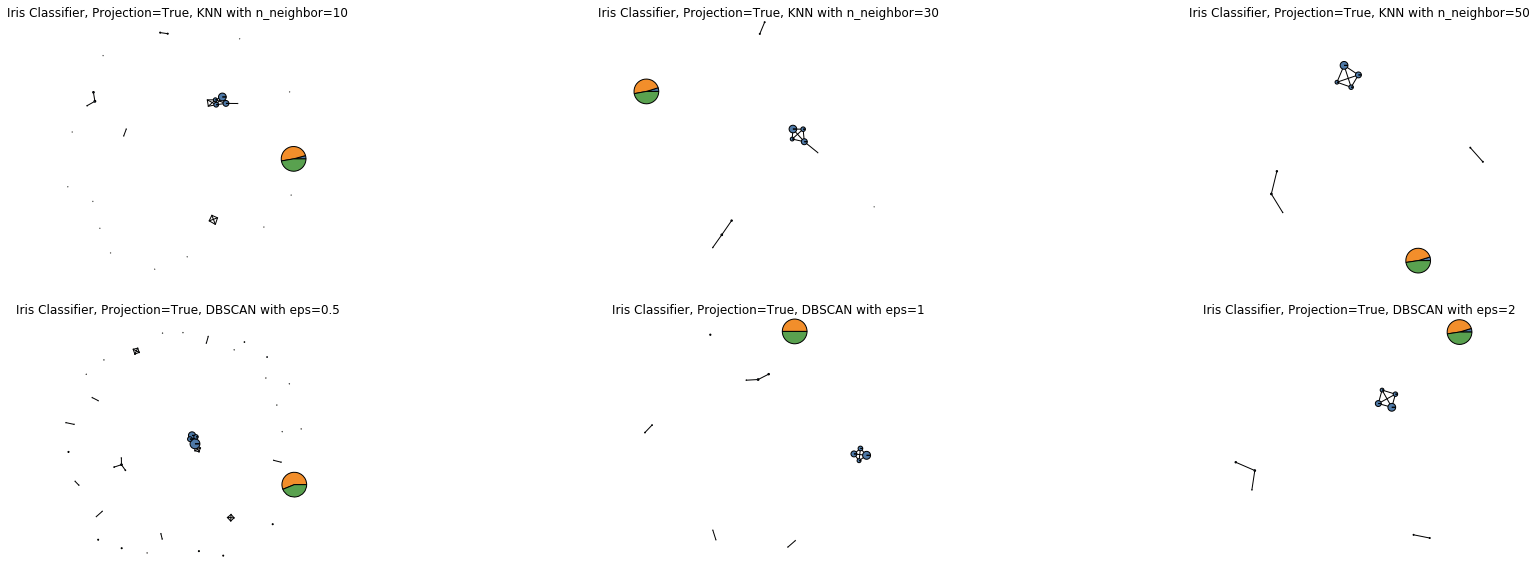

In [16]:
plt.rcParams['figure.facecolor'] = 'white'
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(30,10))

graph = getGraph(data,exp,10,'knn',projection=2)
drawGraph(ax1,graph,iris.target,'Iris Classifier, Projection=True, KNN with n_neighbor=10')

graph = getGraph(data,exp,30,'knn',projection=2)
drawGraph(ax2,graph,iris.target,'Iris Classifier, Projection=True, KNN with n_neighbor=30')

graph = getGraph(data,exp,100,'knn',projection=2)
drawGraph(ax3,graph,iris.target,'Iris Classifier, Projection=True, KNN with n_neighbor=50')

graph = getGraph(data,exp,0.5,'dbscan',projection=2)
drawGraph(ax4,graph,iris.target,'Iris Classifier, Projection=True, DBSCAN with eps=0.5')

graph = getGraph(data,exp,1,'dbscan',projection=2)
drawGraph(ax5,graph,iris.target,'Iris Classifier, Projection=True, DBSCAN with eps=1')

graph = getGraph(data,exp,2,'dbscan',projection=2)
drawGraph(ax6,graph,iris.target,'Iris Classifier, Projection=True, DBSCAN with eps=2')


/Users/gromit/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/gromit/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/gromit/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/gromit/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instea

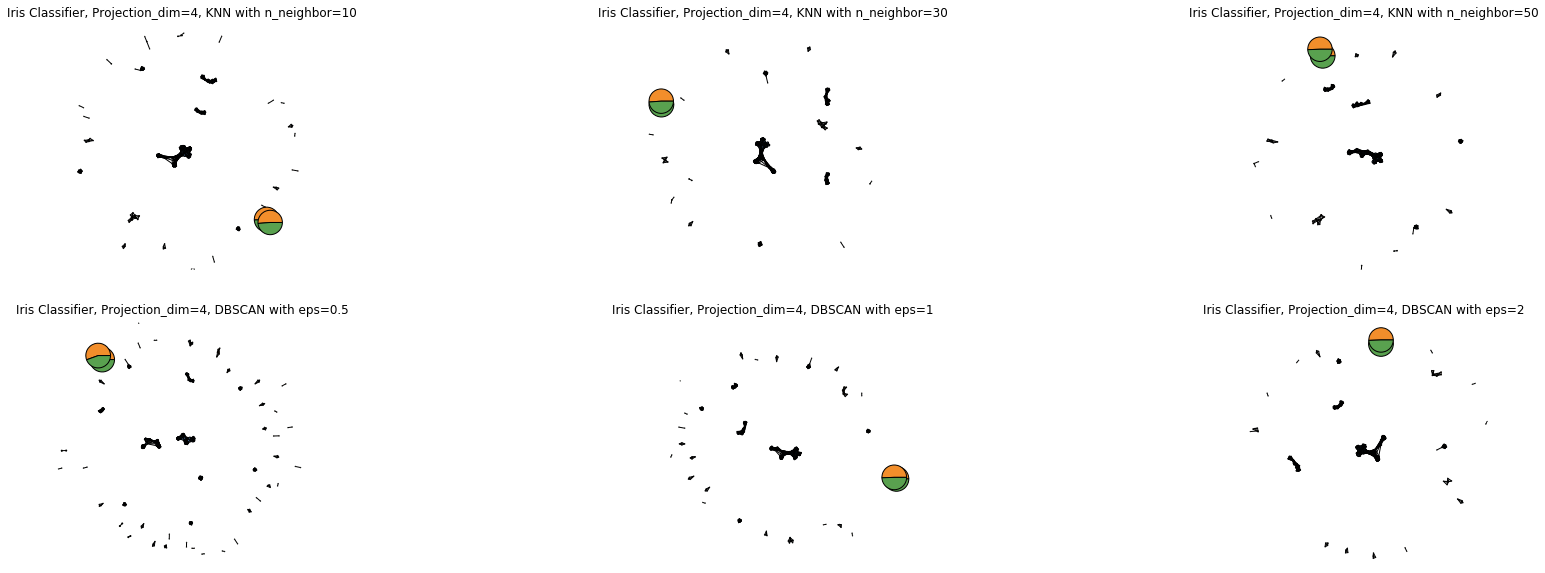

In [17]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(30,10))

graph = getGraph(data,exp,10,'knn',projection=4,cover=km.Cover(10, 0.5))
drawGraph(ax1,graph,iris.target,'Iris Classifier, Projection_dim=4, KNN with n_neighbor=10')

graph = getGraph(data,exp,30,'knn',projection=4,cover=km.Cover(10, 0.5))
drawGraph(ax2,graph,iris.target,'Iris Classifier, Projection_dim=4, KNN with n_neighbor=30')

graph = getGraph(data,exp,100,'knn',projection=4,cover=km.Cover(10, 0.5))
drawGraph(ax3,graph,iris.target,'Iris Classifier, Projection_dim=4, KNN with n_neighbor=50')

graph = getGraph(data,exp,0.5,'dbscan',projection=4,cover=km.Cover(10, 0.5))
drawGraph(ax4,graph,iris.target,'Iris Classifier, Projection_dim=4, DBSCAN with eps=0.5')

graph = getGraph(data,exp,1,'dbscan',projection=4,cover=km.Cover(10, 0.5))
drawGraph(ax5,graph,iris.target,'Iris Classifier, Projection_dim=4, DBSCAN with eps=1')

graph = getGraph(data,exp,2,'dbscan',projection=4,cover=km.Cover(10, 0.5))
drawGraph(ax6,graph,iris.target,'Iris Classifier, Projection_dim=4, DBSCAN with eps=2')